# Comparison of RFM scores
In this notebook we compare the RFM scores extracted from jupyter notebooks ***03a.rfm_scores_via_percentiles*** and ***03b.rfm_scores_via_kmeans***.

In [2]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib ipympl

In [3]:
# Import RFM scores via percentiles
rfm_scores_percentiles = pd.read_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_scores_via_percentiles.csv')
rfm_scores_percentiles.head(10)

,Customer ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346,432.0,34.0,368.36,1,2,2,122
1,12347,3.0,222.0,4921.53,5,5,5,555
2,12348,76.0,51.0,2019.40,3,3,4,334
3,12349,19.0,179.0,4419.49,5,4,5,545
4,12350,311.0,17.0,334.40,2,1,2,212
5,12351,376.0,21.0,300.93,2,2,2,222
6,12352,37.0,107.0,1889.21,4,4,4,444
7,12353,205.0,24.0,406.76,2,2,2,222
8,12354,233.0,58.0,1079.40,2,3,3,233
9,12355,215.0,35.0,947.61,2,2,3,223


In [4]:
print(rfm_scores_percentiles["RFM_Score"].nunique())

115


In [5]:
# number of customers with rfmscore=555
(rfm_scores_percentiles["RFM_Score"]==555).sum()

434

In [6]:
# Import RFM scores via k-means
rfm_scores_kmeans = pd.read_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_scores_via_kmeans.csv')
rfm_scores_kmeans.head(10)

,Customer ID,Recency,Frequency,Monetary,Recency_clustered,Frequency_clustered,Monetary_clustered,score
0,12346,432.0,34.0,368.36,2,1,1,211
1,12347,3.0,222.0,4921.53,5,2,1,521
2,12348,76.0,51.0,2019.40,5,1,1,511
3,12349,19.0,179.0,4419.49,5,1,1,511
4,12350,311.0,17.0,334.40,3,1,1,311
5,12351,376.0,21.0,300.93,2,1,1,211
6,12352,37.0,107.0,1889.21,5,1,1,511
7,12353,205.0,24.0,406.76,3,1,1,311
8,12354,233.0,58.0,1079.40,3,1,1,311
9,12355,215.0,35.0,947.61,3,1,1,311


In [7]:
print(rfm_scores_kmeans["score"].nunique())

40


In [8]:
# Keep only Customer ID and score from both dataframes
rfm_sc_perc = rfm_scores_percentiles.copy()
rfm_sc_perc = rfm_sc_perc[["Customer ID", "Recency", "Frequency", "Monetary", "RFM_Score"]]
rfm_sc_perc.rename(columns={'RFM_Score': 'score'}, inplace=True)

rfm_sc_km = rfm_scores_kmeans.copy()
rfm_sc_km = rfm_sc_km[["Customer ID", "Recency", "Frequency", "Monetary", "score"]]

In [9]:
# There are 11 segments in total
champions = [555, 554, 544, 545, 454, 455, 445]
loyal = [543, 444, 435, 355, 354, 345, 344, 335]
potential_loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 
                      352, 351, 342, 341, 333, 323]
new_customers = [512, 511, 422, 421, 412, 411, 311]
promising = [525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413, 414, 415, 315, 314, 313]
need_attention = [535, 534, 443, 434, 343, 334, 325, 324]
about_to_sleep = [331, 321, 312, 221, 213, 231, 241, 251]
cannot_lose_them_but_losing = [155, 154, 144, 214, 215, 115, 114, 113]
at_risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
hibernating = [332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211]
lost = [111, 112, 121, 131, 141, 151]

segments_names = ["champions","loyal","potential_loyalist","new_customers","promising","need_attention","about_to_sleep",
                  "cannot_lose_them_but_losing","at_risk","hibernating","lost"]

segments = [champions,loyal,potential_loyalist,new_customers,promising,need_attention,about_to_sleep,
            cannot_lose_them_but_losing,at_risk,hibernating,lost] 

In [10]:
# Map customer score to segment id
def customer_segment_id_from_score(score, segments):
    for idx, inner_list in enumerate(segments):
            if score in inner_list:
                return idx
    return None  
    
# Map customer score to segment name  
def customer_segment_name_from_id(id, segments_names):
            return segments_names[id]   

# Apply the function to create a new column in the DataFrame
rfm_sc_perc['segment id'] = rfm_sc_perc['score'].apply(lambda x: customer_segment_id_from_score(x, segments))
rfm_sc_km['segment id'] = rfm_sc_km['score'].apply(lambda x: customer_segment_id_from_score(x, segments))

rfm_sc_perc['segment_name'] = rfm_sc_perc['segment id'].apply(lambda x: customer_segment_name_from_id(x, segments_names))
rfm_sc_km['segment_name'] = rfm_sc_km['segment id'].apply(lambda x: customer_segment_name_from_id(x, segments_names))

In [11]:
rfm_sc_perc.head()

,Customer ID,Recency,Frequency,Monetary,score,segment id,segment_name
0,12346,432.0,34.0,368.36,122,9,hibernating
1,12347,3.0,222.0,4921.53,555,0,champions
2,12348,76.0,51.0,2019.40,334,5,need_attention
3,12349,19.0,179.0,4419.49,545,0,champions
4,12350,311.0,17.0,334.40,212,9,hibernating


In [12]:
rfm_sc_km.head()

,Customer ID,Recency,Frequency,Monetary,score,segment id,segment_name
0,12346,432.0,34.0,368.36,211,9,hibernating
1,12347,3.0,222.0,4921.53,521,4,promising
2,12348,76.0,51.0,2019.40,511,3,new_customers
3,12349,19.0,179.0,4419.49,511,3,new_customers
4,12350,311.0,17.0,334.40,311,3,new_customers


In [13]:
# How many customers are there in each segment? (1st method)
occurrences = rfm_sc_perc['segment id'].value_counts().sort_index().to_dict()
print(occurrences)

{0: 1112, 1: 623, 2: 644, 3: 397, 4: 206, 5: 300, 6: 207, 7: 107, 8: 519, 9: 1133, 10: 600}


In [14]:
# 2nd method
occurrences = rfm_sc_km['segment id'].value_counts().sort_index().to_dict()
print(occurrences)

{0: 3, 1: 4, 2: 129, 3: 3358, 4: 683, 5: 3, 6: 63, 9: 1005, 10: 600}


In [15]:
# 10: 600, einai oi idioi arage?
segment_10_customers_perc = pd.DataFrame(rfm_sc_perc[rfm_sc_perc['segment id'] == 10]['Customer ID']).reset_index()
segment_10_customers_km = pd.DataFrame(rfm_sc_km[rfm_sc_km['segment id'] == 10]['Customer ID']).reset_index()

(segment_10_customers_perc['Customer ID'] == segment_10_customers_km['Customer ID']).sum()


23

### Clusters in 3D plots

In [16]:
# Plot the clusters in 3D
def scatter_2segments_3d(rfm_cust_seg1,rfm_cust_seg2,cmap):
    """
    """
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(121, projection='3d')

    scatter1 = ax1.scatter(
        rfm_cust_seg1['Recency'], rfm_cust_seg1['Frequency'], rfm_cust_seg1['Monetary'],
        c=rfm_cust_seg1['segment id'], cmap=cmap, marker='o',
    )

    ax1.set_xlabel('Recency')
    ax1.set_ylabel('Frequency')
    ax1.set_zlabel('Monetary')
    ax1.set_title('RFM segments')

    # Add legend
    #legend1 = ax1.legend(*scatter1.legend_elements(), title="Segments via Percentiles")
    #ax1.add_artist(legend1)

    
    """
    """
    ax2 = fig.add_subplot(122, projection='3d')

    scatter2 = ax2.scatter(
        rfm_cust_seg2['Recency'], rfm_cust_seg2['Frequency'], rfm_cust_seg2['Monetary'],
        c=rfm_cust_seg2['segment id'], cmap=cmap, marker='o'
    )

    ax2.set_xlabel('Recency')
    ax2.set_ylabel('Frequency')
    ax2.set_zlabel('Monetary')
    ax2.set_title('RFM segments')

    # Add legend
    legend1 = ax1.legend(*scatter1.legend_elements(), title="Segments", loc='upper center', ncol=len(rfm_cust_seg1.columns))
    ax1.add_artist(legend1)
    

    plt.show()

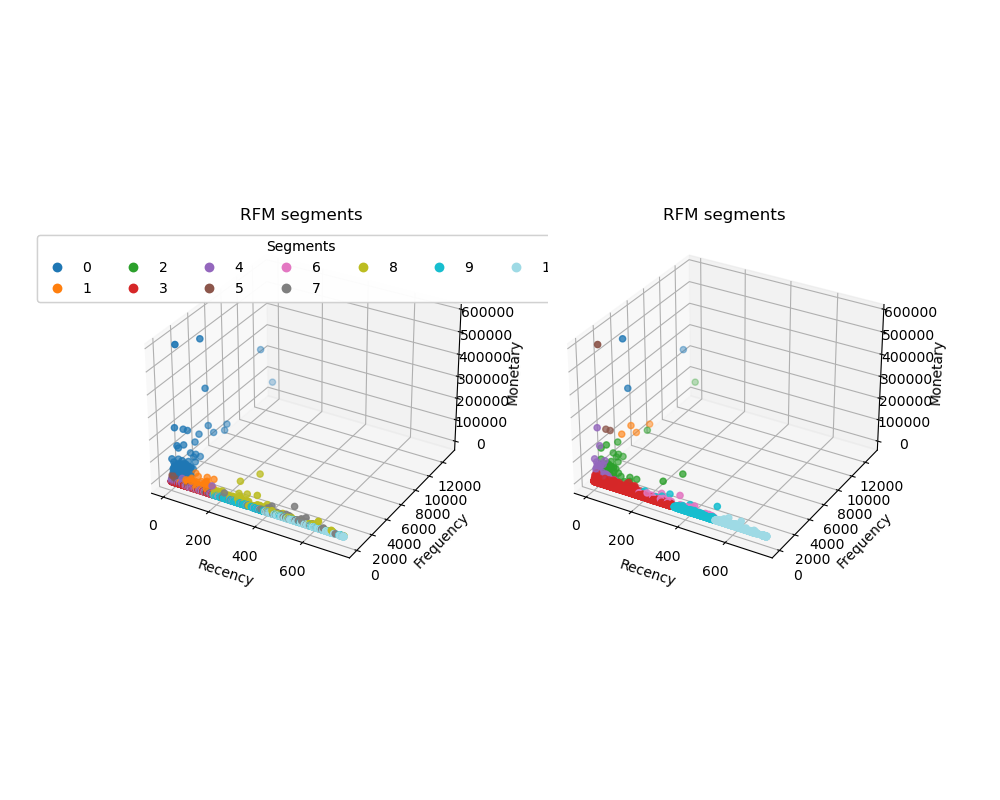

In [17]:
scatter_2segments_3d(rfm_sc_perc, rfm_sc_km, 'tab20')

### Plot number of customers by segment id

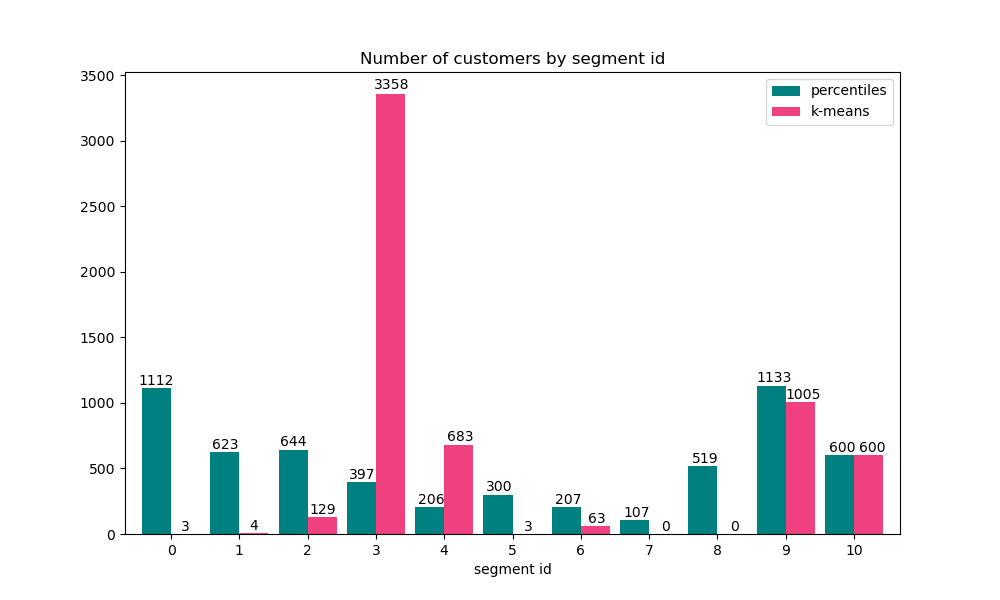

In [18]:
# Group by 'segment id' and count unique Customer IDs in both DataFrames
customer_counts_perc = rfm_sc_perc.groupby('segment id')['Customer ID'].nunique()
customer_counts_km = rfm_sc_km.groupby('segment id')['Customer ID'].nunique()

# Combine both into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'percentiles': customer_counts_perc,
    'k-means': customer_counts_km
}).fillna(0)  # Filling NaN with 0 in case some segment ids don't appear in both DataFrames

# Plotting the grouped bar chart
ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=['#008080', '#ef4080'], width=0.85)

# Adding labels and title
plt.title('Number of customers by segment id')
plt.xlabel('segment id')
plt.xticks(rotation=0)
plt.legend()

# Adding the value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() * 1.005 + p.get_width() / 2, p.get_height() * 1.005), 
                ha='center', va='bottom')

# Display the plot
plt.show()

### Plot average amount spent by segment id (Average Monetary)

In [19]:
# Merge the DataFrames on 'segment id'
df_combined = pd.merge(rfm_sc_perc[['segment id', 'Monetary']],
                       rfm_sc_km[['segment id', 'Monetary']],
                       on='segment id', 
                       suffixes=('_m1', '_m2'))

In [20]:
# Calculate the average Monetary value for each segment
avg_monetary_m1 = rfm_sc_perc.groupby('segment id')['Monetary'].mean().reset_index()
avg_monetary_m1.rename(columns={'Monetary': 'avg_Monetary_m1'}, inplace=True)

avg_monetary_m2 = rfm_sc_km.groupby('segment id')['Monetary'].mean().reset_index()
avg_monetary_m2.rename(columns={'Monetary': 'avg_Monetary_m2'}, inplace=True)

# Merge these averages into a single DataFrame
df_avg_monetary = pd.merge(avg_monetary_m1, avg_monetary_m2, on='segment id')

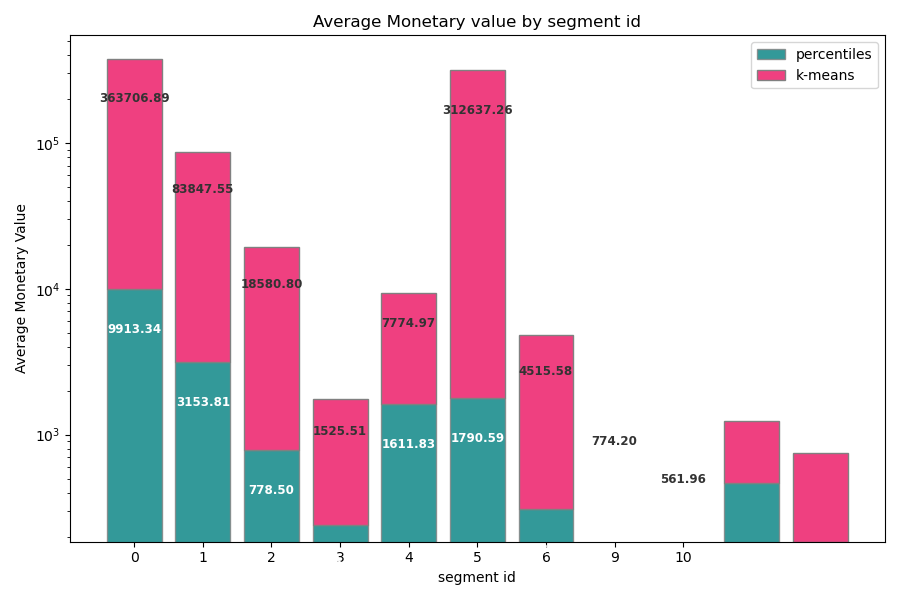

In [21]:
# Create a figure
plt.figure(figsize=(9, 6))

# Plot stacked bar chart for 1st df (rfm_sc_perc)
plt.bar(df_avg_monetary['segment id'], df_avg_monetary['avg_Monetary_m1'], color='#008080', edgecolor='grey', alpha=0.8,
        label='percentiles')

# Plot stacked bar chart for Method 2nd df (rfm_sc_km) on top of 1st df
plt.bar(df_avg_monetary['segment id'], df_avg_monetary['avg_Monetary_m2'], 
        bottom=df_avg_monetary['avg_Monetary_m1'], color='#ef4080', edgecolor='grey', label='k-means') #, alpha=0.8 for transparency of bars

# Add labels for 1st df (at the base of the bars)
for i in range(len(df_avg_monetary)):
    plt.text(i, df_avg_monetary['avg_Monetary_m1'][i] / 2, 
             f'{df_avg_monetary["avg_Monetary_m1"][i]:.2f}', ha='center', color='white', fontweight='bold', fontsize=8.5)

# Add labels for 2nd df (on top of the stacked bars)
for i in range(len(df_avg_monetary)):
    total_height = df_avg_monetary['avg_Monetary_m1'][i] + df_avg_monetary['avg_Monetary_m2'][i]
    plt.text(i, total_height - df_avg_monetary['avg_Monetary_m2'][i] / 2, 
             f'{df_avg_monetary["avg_Monetary_m2"][i]:.2f}', ha='center', color='0.2', fontweight='bold', fontsize=8.5)

# Add labels and title
plt.xlabel('segment id')
plt.ylabel('Average Monetary Value')
plt.title('Average Monetary value by segment id')
plt.yscale('log')

# Customize x-axis tick labels
plt.xticks(np.arange(len(df_avg_monetary['segment id'])), df_avg_monetary['segment id'])

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Plot average recency by segment id (Average Recency)

In [22]:
# Calculate the average Recency for each segment
avg_recency_m1 = rfm_sc_perc.groupby('segment id')['Recency'].mean().reset_index()
avg_recency_m1.rename(columns={'Recency': 'avg_Recency_m1'}, inplace=True)

avg_recency_m2 = rfm_sc_km.groupby('segment id')['Recency'].mean().reset_index()
avg_recency_m2.rename(columns={'Recency': 'avg_Recency_m2'}, inplace=True)

# Merge the two averages into a single DataFrame
df_avg_recency = pd.merge(avg_recency_m1, avg_recency_m2, on='segment id')

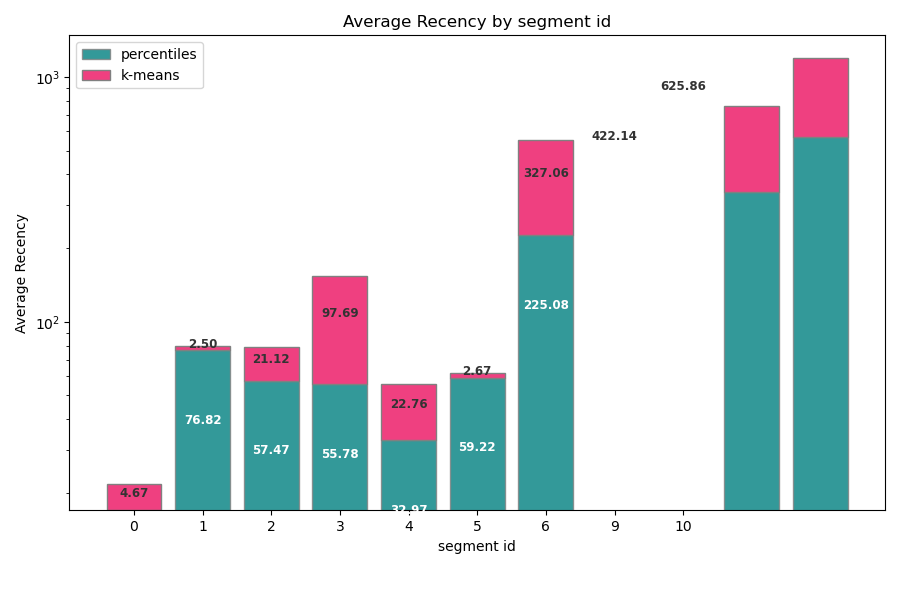

In [23]:
# Create a figure
plt.figure(figsize=(9, 6))

# Plot stacked bar chart for Method 1 (Recency)
plt.bar(df_avg_recency['segment id'], df_avg_recency['avg_Recency_m1'], color='#008080', edgecolor='grey', alpha=0.8, label='percentiles')

# Plot stacked bar chart for Method 2 on top of Method 1 (Recency)
plt.bar(df_avg_recency['segment id'], df_avg_recency['avg_Recency_m2'], 
        bottom=df_avg_recency['avg_Recency_m1'], color='#ef4080', edgecolor='grey', label='k-means')

# Add labels for Method 1 (at the base of the bars)
for i in range(len(df_avg_recency)):
    plt.text(i, df_avg_recency['avg_Recency_m1'][i] / 2, 
             f'{df_avg_recency["avg_Recency_m1"][i]:.2f}', ha='center', color='white', fontweight='bold', fontsize=8.5)

# Add labels for Method 2 (on top of the stacked bars)
for i in range(len(df_avg_recency)):
    total_height = df_avg_recency['avg_Recency_m1'][i] + df_avg_recency['avg_Recency_m2'][i]
    plt.text(i, total_height - df_avg_recency['avg_Recency_m2'][i] / 2, 
             f'{df_avg_recency["avg_Recency_m2"][i]:.2f}', ha='center', color='0.2', fontweight='bold', fontsize=8.5)

# Add labels and title
plt.xlabel('segment id')
plt.ylabel('Average Recency')
plt.title('Average Recency by segment id')
plt.yscale('log')

# Customize x-axis tick labels
plt.xticks(np.arange(len(df_avg_recency['segment id'])), df_avg_recency['segment id'])

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

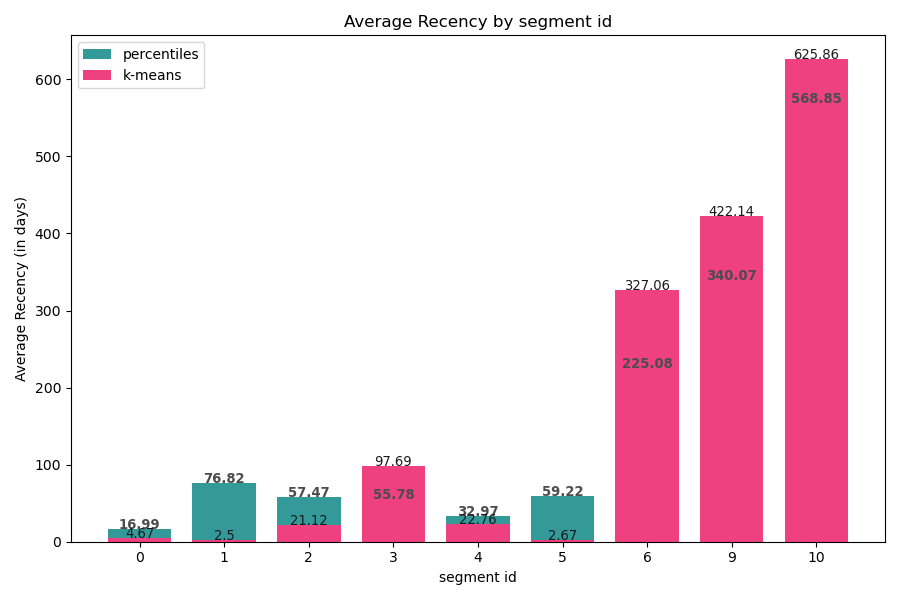

In [24]:
# 1. Group by 'segment id' and calculate the mean of 'Recency'
avg_recency_m1 = rfm_sc_perc.groupby('segment id')['Recency'].mean().reset_index()
avg_recency_m2 = rfm_sc_km.groupby('segment id')['Recency'].mean().reset_index()

# Rename columns for clarity
avg_recency_m1.columns = ['segment id', 'avg_recency_m1']
avg_recency_m2.columns = ['segment id', 'avg_recency_m2']

# 2. Merge the results on 'segment id'
merged_df = pd.merge(avg_recency_m1, avg_recency_m2, on='segment id')

# 3. Plotting
plt.figure(figsize=(9,6))

# Bar width
bar_width = 0.75

# Positions of the bars
index = range(len(merged_df['segment id']))

# Plot the bars for method 1 and method 2 at the same position (overlapping)
bars_m1 = plt.bar(index, merged_df['avg_recency_m1'], width=bar_width, label='percentiles', alpha=0.8, color='#008080')
bars_m2 = plt.bar(index, merged_df['avg_recency_m2'], width=bar_width, label='k-means', color='#ef4080')

# Add labels on top of the bars for rfm_sc_perc
for bar in bars_m1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='baseline', color='0.3', fontsize=9.5, fontweight='bold')

# Add labels on top of the bars for rfm_sc_km
for bar in bars_m2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='baseline', color='0.1', fontsize=9.5)

# Labels and title
plt.xlabel('segment id')
plt.ylabel('Average Recency (in days)')
plt.title('Average Recency by segment id')

# Add xticks for segment ids
plt.xticks(index, merged_df['segment id'])

# Display legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Spider Charts

In [25]:
# WE HAVE NO CUSTOMERS IN SEGMENTS 7 OR 8 for k-means
# ADD FAKE ONES FOR AVOIDING CODE ERRORS

zero_row7 = pd.DataFrame({'Customer ID': [1], 'Recency': [0], 'Frequency': [0], 'Monetary': [0], 'score': [155], 'segment id': [7], 'segment_name': ['cannot_lose_them_but_losing']})
zero_row8 = pd.DataFrame({'Customer ID': [2], 'Recency': [0], 'Frequency': [0], 'Monetary': [0], 'score': [255], 'segment id': [8], 'segment_name': ['at_risk']})

# Append the new row to the DataFrame
rfm_sc_km = pd.concat([rfm_sc_km, zero_row7], ignore_index=True)
rfm_sc_km = pd.concat([rfm_sc_km, zero_row8], ignore_index=True)

In [26]:
# Function to plot radar chart
def plot_radar_chart(ax, data1, data2, labels, title):
    num_vars = len(labels)
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Complete the loop for both datasets by appending the first value at the end
    data1 = np.concatenate((data1, [data1[0]]))
    data2 = np.concatenate((data2, [data2[0]]))
    angles += angles[:1]
    
    # Plot both polygons (one for each DataFrame)
    ax.fill(angles, data1, color='#008080', alpha=0.25)
    ax.plot(angles, data1, color='#008080', linewidth=2, label='percentiles')
    
    ax.fill(angles, data2, color='#EF4080', alpha=0.25)
    ax.plot(angles, data2, color='#EF4080', linewidth=2, label='k-means')
    
    # Remove the y-axis labels
    ax.set_yticklabels([])
    
    # Set the number of ticks and labels for the variables
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    # Add a title to each subplot
    ax.set_title(title, size=12, color='black', y=1.1)

In [27]:
segments_vs_n = []

for i in range(0, rfm_sc_perc['segment_name'].nunique()):
    segments_vs_i = pd.concat(
        [pd.DataFrame(rfm_sc_perc.groupby('segment_name').mean()[['Recency', 'Frequency', 'Monetary']].iloc[i]).transpose(), 
         pd.DataFrame(rfm_sc_km.groupby  ('segment_name').mean()[['Recency', 'Frequency', 'Monetary']].iloc[i]).transpose()], 
        ignore_index=True)
    zero_row = pd.DataFrame({'Recency': [0], 'Frequency': [0], 'Monetary': [0]})
    segments_vs_i = pd.concat([segments_vs_i, zero_row], ignore_index=True)

    segments_vs_n.append(segments_vs_i)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for i in range(0, rfm_sc_perc['segment_name'].nunique()):
    segments_vs_n[i][['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(segments_vs_n[i][['Recency', 'Frequency', 'Monetary']])

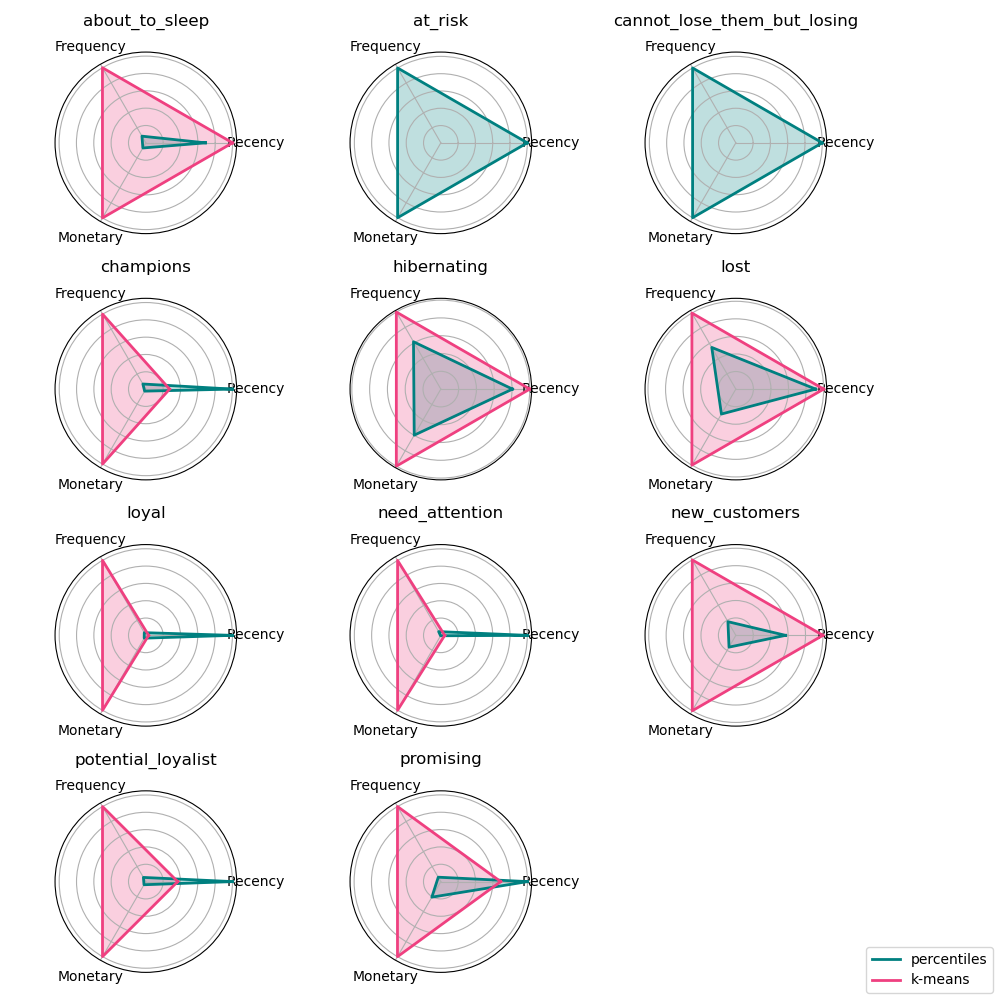

In [29]:
# Group by 'segment_name' and calculate mean for Recency, Frequency, and Monetary
grouped_df1 = rfm_sc_perc.groupby('segment_name').mean()[['Recency', 'Frequency', 'Monetary']]
grouped_df2 = rfm_sc_km.groupby('segment_name').mean()[['Recency', 'Frequency', 'Monetary']]

# Prepare the categories (columns) for the radar chart
categories = ['Recency', 'Frequency', 'Monetary']
title = 'percentiles vs column k-means'

# Create subplots for each segment (11 segments in total)
num_segments = len(grouped_df1)
rows = int(np.ceil(num_segments / 3))  # Adjust the number of rows based on the number of segments
fig, axes = plt.subplots(rows, 3, figsize=(10, 10), subplot_kw=dict(polar=True))

# Flatten the axes array if there are multiple rows
axes = axes.flatten()

# Plot a radar chart for each segment (comparing df1 and df2)
for i, segment_id in enumerate(grouped_df1.index):
    plot_radar_chart(axes[i], segments_vs_n[i].loc[0].values, segments_vs_n[i].loc[1].values, categories, 
                     f'{segment_id}')

# Remove any empty subplots (if there are fewer than 11 segments)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for the entire figure
# We'll create a legend from the last axis but place it outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on the right for the legend
plt.show()

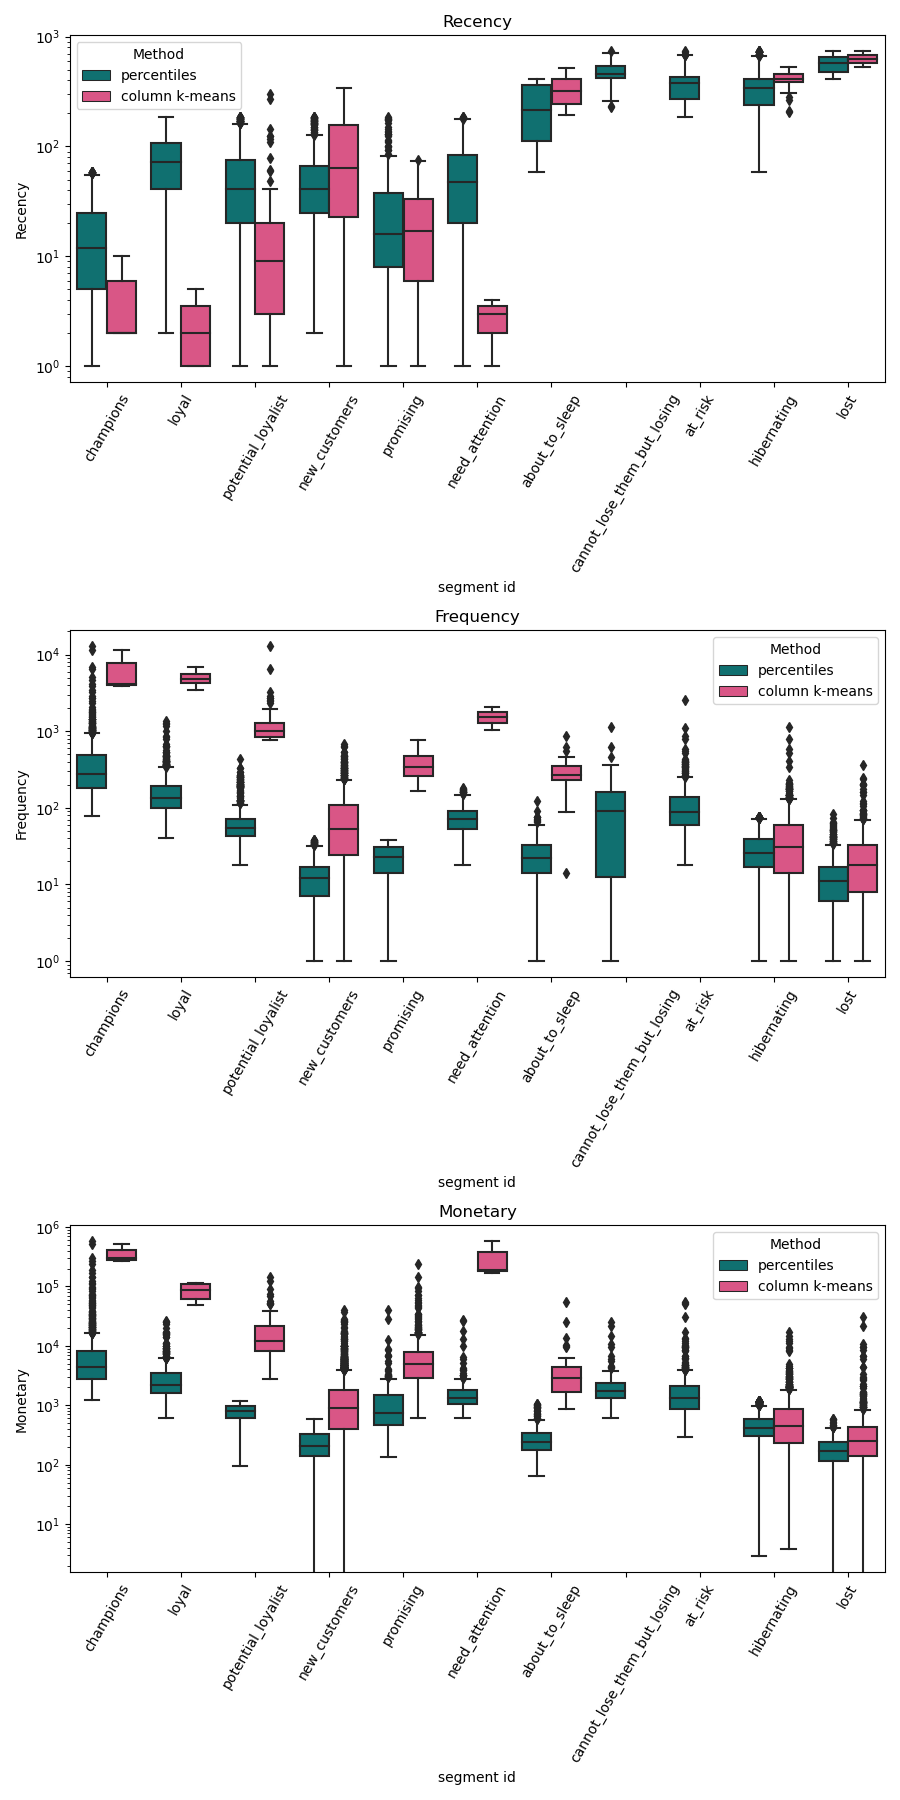

In [30]:
df_m1 = rfm_sc_perc.copy()
df_m2 = rfm_sc_km.copy()

#Combine M1 and M2 DataFrames for easier plotting
df_m1['Method'] = 'percentiles'
df_m2['Method'] = 'column k-means'
combined_df = pd.concat([df_m1, df_m2])

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(9, 18))

# Define metrics and titles for subplots
metrics = ['Recency', 'Frequency', 'Monetary']
titles = ['Recency', 'Frequency', 'Monetary']

# Create boxplots for each metric
for i, metric in enumerate(metrics):
    sns.boxplot(
        data=combined_df,
        x='segment id',
        y=metric,
        hue='Method',
        palette=['#008080', '#EF4080'],
        ax=axes[i],
        width=0.8  # Adjust the width of the boxplots
    )
    
    axes[i].set_title(titles[i])
    axes[i].set_yscale('log')
    if i==0:
        axes[i].legend(title='Method', loc='upper left')
    else:
        axes[i].legend(title='Method', loc='upper right')
    axes[i].set_xticks([x for x in range(0,11)])  # Adjust x-ticks to increase space between segments
    axes[i].set_xticklabels([f'{segments_names[x]}' for x in range(0, 11)])
    axes[i].tick_params(axis='x', rotation=60) 

    plt.tight_layout()
plt.show()


In [51]:
# Assuming df_m1 is the DataFrame from method 1, and df_m2 is the DataFrame from method 2
# Also assuming the columns are: 'Customer ID', 'Recency', 'Frequency', 'Monetary', 'Score', 'segment id'

# Step 1: Merge both DataFrames on 'Customer ID'
df_combined = pd.merge(df_m1[['Customer ID', 'segment id']], 
                       df_m2[['Customer ID', 'segment id']], 
                       on='Customer ID', 
                       suffixes=('_m1', '_m2'))

# Step 2: Filter rows where segment ids are the same in both methods
df_same_segment = df_combined[df_combined['segment id_m1'] == df_combined['segment id_m2']]

# Step 3: Count the total number of customers in each segment for both methods
m1_segment_sizes = df_m1.groupby('segment id').size().reset_index(name='Size_m1')
m2_segment_sizes = df_m2.groupby('segment id').size().reset_index(name='Size_m2')

# Step 4: Count the number of common customers in each segment where both methods agree
common_counts = df_same_segment.groupby('segment id_m1').size().reset_index(name='Common Count')

# Step 5: Merge the common counts with the segment sizes of both m1 and m2
segment_counts = pd.merge(common_counts, m1_segment_sizes, left_on='segment id_m1', right_on='segment id', how='right')
segment_counts = pd.merge(segment_counts, m2_segment_sizes, on='segment id', how='right')

# Step 6: Fill NaN values with 0 for common counts
segment_counts['Common Count'] = segment_counts['Common Count'].fillna(0).astype(int)

# Step 7: Calculate the percentage of common customers relative to each method's segment size
segment_counts['Percentage_percentiles'] = ((segment_counts['Common Count'] / segment_counts['Size_m1']) * 100).round(2)
segment_counts['Percentage_column_k_means'] = ((segment_counts['Common Count'] / segment_counts['Size_m2']) * 100).round(2)

# Step 8: Ensure all segments (1 to 11) are represented, even with 0 percentages
all_segments = pd.DataFrame({'segment id': range(0, rfm_sc_perc['segment id'].nunique())})  # Assuming segments are 1 to 11

# Merge to ensure all segments are present
segment_counts = pd.merge(all_segments, segment_counts, on='segment id', how='left')

# Fill NaN values with 0 for sizes and percentages
segment_counts[['Common Count', 'Size_m1', 'Size_m2']] = segment_counts[['Common Count', 'Size_m1', 'Size_m2']].fillna(0).astype(int)
segment_counts['Percentage_percentiles'] = segment_counts['Percentage_percentiles'].fillna(0)
segment_counts['Percentage_column_k_means'] = segment_counts['Percentage_column_k_means'].fillna(0)

# Final output: segment id, Common Count, and Percentages
print(segment_counts[['segment id', 'Common Count', 'Percentage_percentiles', 'Percentage_column_k_means']])
segment_counts[['segment id', 'Common Count', 'Percentage_percentiles', 'Percentage_column_k_means']].head(11)

    segment id  Common Count  Percentage_percentiles  \
0            0             3                    0.27   
1            1             0                    0.00   
2            2             0                    0.00   
3            3           397                  100.00   
4            4             0                    0.00   
5            5             0                    0.00   
6            6             0                    0.00   
7            7             0                    0.00   
8            8             0                    0.00   
9            9           429                   37.86   
10          10           380                   63.33   

    Percentage_column_k_means  
0                      100.00  
1                        0.00  
2                        0.00  
3                       11.82  
4                        0.00  
5                        0.00  
6                        0.00  
7                        0.00  
8                        0.00  
9      

,segment id,Common Count,Percentage_percentiles,Percentage_column_k_means
0,0,3,0.27,100.00
1,1,0,0.00,0.00
2,2,0,0.00,0.00
3,3,397,100.00,11.82
4,4,0,0.00,0.00
5,5,0,0.00,0.00
6,6,0,0.00,0.00
7,7,0,0.00,0.00
8,8,0,0.00,0.00
9,9,429,37.86,42.69


In [53]:

# Create a mapping from segment id to segment name
segment_id_to_name = dict(enumerate(segments_names))

# Add a new column 'segment name' in segment_counts using the mapping
segment_counts['segment name'] = segment_counts['segment id'].map(segment_id_to_name)

# Select only the necessary columns for the final output, excluding 'segment id'
final_output = segment_counts[['segment name', 'Common Count', 'Percentage_percentiles', 'Percentage_column_k_means']]

# Display the final output
final_output.head(11)

,segment name,Common Count,Percentage_percentiles,Percentage_column_k_means
0,champions,3,0.27,100.00
1,loyal,0,0.00,0.00
2,potential_loyalist,0,0.00,0.00
3,new_customers,397,100.00,11.82
4,promising,0,0.00,0.00
5,need_attention,0,0.00,0.00
6,about_to_sleep,0,0.00,0.00
7,cannot_lose_them_but_losing,0,0.00,0.00
8,at_risk,0,0.00,0.00
9,hibernating,429,37.86,42.69


### Examples of customers that belong to different segments in each method

In [71]:
# Compare customers perc vs km by score

# Function to calculate the sum of differences between individual digits of two scores
def digit_difference(score1, score2):
    # Convert both scores to strings to compare their digits
    str1 = f"{score1:.2f}".replace(".", "")  # Get the digits as string, e.g., 0.75 -> '075'
    str2 = f"{score2:.2f}".replace(".", "")  # Get the digits as string, e.g., 0.80 -> '080'
    
    # Sum of the absolute difference between corresponding digits
    total_diff = sum(abs(int(a) - int(b)) for a, b in zip(str1, str2))
    
    return total_diff

# Merge DataFrames on 'Customer ID', include 'score' and 'segment id'
merged_df = pd.merge(rfm_sc_perc[['Customer ID', 'score', 'segment id']], 
                     rfm_sc_km[['Customer ID', 'score', 'segment id']], 
                     on='Customer ID', suffixes=('_perc', '_km'))

# Calculate the sum of digit differences between scores
merged_df['score_digit_diff'] = merged_df.apply(lambda row: digit_difference(row['score_perc'], row['score_km']), axis=1)

# Sort first by digit difference in descending order, then by 'score_km' in ascending order
sorted_customers = merged_df.sort_values(by=['score_digit_diff', 'score_km'], ascending=[False, True])

# Create a mapping from segment id to segment name
segment_id_to_name = dict(enumerate(segments_names))

# Add a new column 'segment name' in segment_counts using the mapping
sorted_customers['segment name perc'] = sorted_customers['segment id_perc'].map(segment_id_to_name)
sorted_customers['segment name km']   = sorted_customers['segment id_km'].map(segment_id_to_name)

sorted_customers = sorted_customers[['Customer ID', 'score_perc', 'score_km', 'score_digit_diff', 'segment name perc', 'segment name km']]
# Display the result
sorted_customers.head(10)

,Customer ID,score_perc,score_km,score_digit_diff,segment name perc,segment name km
1151,13520,355,511,10,loyal,new_customers
2846,15241,355,511,10,loyal,new_customers
2860,15255,355,511,10,loyal,new_customers
3359,15757,355,511,10,loyal,new_customers
4046,16455,355,511,10,loyal,new_customers
163,12511,155,211,9,cannot_lose_them_but_losing,hibernating
1078,13446,155,211,9,cannot_lose_them_but_losing,hibernating
3235,15633,155,211,9,cannot_lose_them_but_losing,hibernating
4722,17145,155,211,9,cannot_lose_them_but_losing,hibernating
275,12625,255,311,9,at_risk,new_customers


In [34]:
# how many *55 <--> *11 ?

# Function to calculate the sum of differences between individual digits of two scores
def digit_difference_5511(score1, score2):
    # Convert both scores to strings to compare their digits
    str1 = f"{score1:.2f}".replace(".", "")  # Get the digits as string, e.g., 0.75 -> '075'
    str2 = f"{score2:.2f}".replace(".", "")  # Get the digits as string, e.g., 0.80 -> '080'
    
    # Sum of the absolute difference between corresponding digits
    diff1 = abs(int(str1[1]) - int(str2[1]))
    diff2 = abs(int(str1[2]) - int(str2[2]))
      
    if diff2 == 4 and diff1 == 4:
        return True
    else:
        return False

# Calculate the sum of digit differences between scores
merged_df['score_digit_diff_5511'] = merged_df.apply(lambda row: digit_difference_5511(row['score_perc'], row['score_km']), axis=1)

# Sort first by digit difference in descending order, then by 'score_km' in ascending order
customers_5511 = (merged_df['score_digit_diff_5511'] == True).sum()
print(customers_5511)

85


In [35]:
# For how many diff = 0? how many 1? how many ... 10? (no more than 10; theoretically 12)
score_diffs = []
for i in range(0,13):
    score_diffs.append((sorted_customers["score_digit_diff"] == i).sum())
score_diffs

[350, 658, 569, 641, 577, 768, 817, 893, 464, 106, 5, 0, 0]

In [123]:
# Compare customers perc vs km by segment id

# Function to calculate the sum of differences between individual digits of two scores
def digit_difference(score1, score2):
    # Convert both scores to strings to compare their digits
    #str1 = f"{score1:.2f}".replace(".", "")  # Get the digits as string, e.g., 0.75 -> '075'
    #str2 = f"{score2:.2f}".replace(".", "")  # Get the digits as string, e.g., 0.80 -> '080'
    
    # Sum of the absolute difference between corresponding digits
    total_diff = (abs(score1- score2))
    
    return total_diff

# Merge DataFrames on 'Customer ID', include 'score' and 'segment id'
merged_df = pd.merge(rfm_sc_perc[['Customer ID', 'score', 'segment id']], 
                     rfm_sc_km[['Customer ID', 'score', 'segment id']], 
                     on='Customer ID', suffixes=('_perc', '_km'))

# Calculate the sum of digit differences between scores
merged_df['score_digit_diff'] = merged_df.apply(lambda row: digit_difference(row['segment id_perc'], row['segment id_km']), axis=1)

# Sort first by digit difference in descending order, then by 'score_km' in ascending order
sorted_customers = merged_df.sort_values(by=['score_digit_diff'], ascending=[False])

# Create a mapping from segment id to segment name
segment_id_to_name = dict(enumerate(segments_names))

# Add a new column 'segment name' in segment_counts using the mapping
sorted_customers['segment name perc'] = sorted_customers['segment id_perc'].map(segment_id_to_name)
sorted_customers['segment name km']   = sorted_customers['segment id_km'].map(segment_id_to_name)

sorted_customers = sorted_customers[['Customer ID', 'score_perc', 'score_km', 'score_digit_diff', 'segment name perc', 'segment name km']]

# Display the result
sorted_customers.head(10)

,Customer ID,score_perc,score_km,score_digit_diff,segment name perc,segment name km
2924,15319,211,311,6,hibernating,new_customers
590,12945,233,311,6,hibernating,new_customers
2818,15213,222,311,6,hibernating,new_customers
2821,15216,322,411,6,hibernating,new_customers
4563,16982,322,511,6,hibernating,new_customers
2828,15223,223,311,6,hibernating,new_customers
4558,16976,211,311,6,hibernating,new_customers
4549,16967,222,411,6,hibernating,new_customers
4545,16963,211,411,6,hibernating,new_customers
2830,15225,222,311,6,hibernating,new_customers


In [92]:
# For how many diff = 0? how many 1? how many ... 10? (no more than 10; theoretically 12)
score_diffs = []
for i in range(0,11):
    score_diffs.append((sorted_customers["score_digit_diff"] == i).sum())
score_diffs

[1209, 1444, 1166, 675, 608, 175, 571, 0, 0, 0, 0]

In [112]:
# Group by the unique combination of 'segment name km' and 'segment name perc'
grouped_df = sorted_customers.groupby(['segment name km', 'segment name perc']).agg(
    customer_count=('Customer ID', 'size'),                # Count of customers in each group
).reset_index()

#print(grouped_df)

# Pivot to create the table with customer counts
pivot_table = grouped_df.pivot(index='segment name km', columns='segment name perc', values='customer_count')

# Reindex rows and columns to enforce the desired order
pivot_table = pivot_table.reindex(index=segments_names, columns=segments_names).fillna(0).astype(int)

pivot_table


segment name perc,champions,loyal,potential_loyalist,new_customers,promising,need_attention,about_to_sleep,cannot_lose_them_but_losing,at_risk,hibernating,lost
segment name km,,,,,,,,,,,
champions,3,0,0,0,0,0,0,0,0,0,0
loyal,4,0,0,0,0,0,0,0,0,0,0
potential_loyalist,119,8,0,0,0,0,0,0,2,0,0
new_customers,381,558,620,397,206,300,149,6,172,569,0
promising,602,57,24,0,0,0,0,0,0,0,0
need_attention,3,0,0,0,0,0,0,0,0,0,0
about_to_sleep,0,0,0,0,0,0,0,12,51,0,0
cannot_lose_them_but_losing,0,0,0,0,0,0,0,0,0,0,0
at_risk,0,0,0,0,0,0,0,0,0,0,0


C:\Users\argyr\AppData\Local\Temp\ipykernel_896\1758101654.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


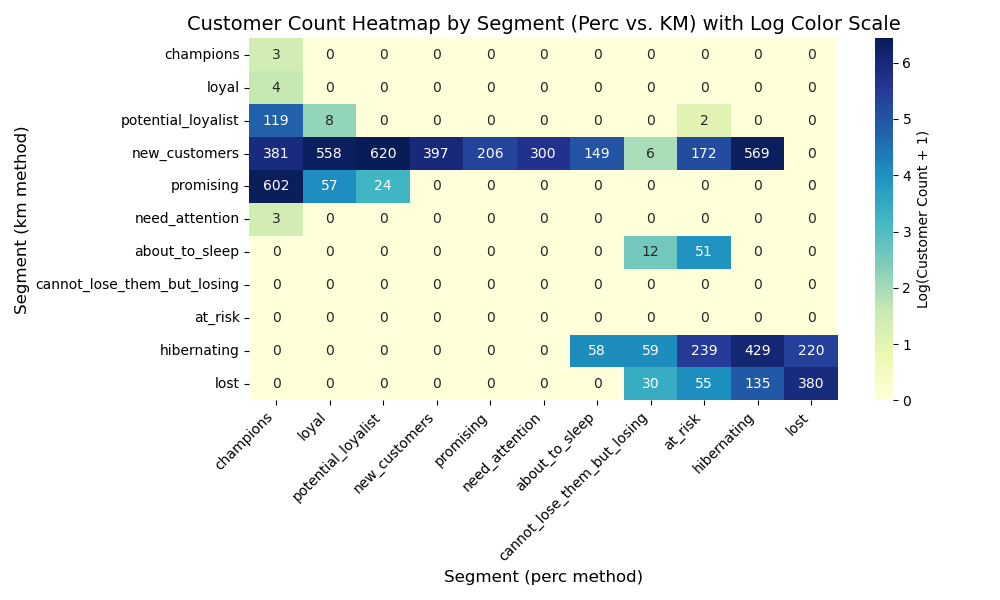

In [131]:
# Turn the table above into a heatmap

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
heatmap = sns.heatmap(np.log1p(pivot_table), annot=pivot_table, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Log(Customer Count + 1)'})

# Adjusting tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)

# Set labels and title
plt.xlabel('Segment (perc method)', fontsize=12)
plt.ylabel('Segment (km method)', fontsize=12)
plt.title('Customer Count Heatmap by Segment (Perc vs. KM) with Log Color Scale', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [36]:
# Customer ID **17450** -----R=9, F=418, M=233803.91--------------------------------- ANALYSE THIS
# percentiles ---> score: 555 -- champions -- segment id: 0
# kmeans      ---> score: 524 -- promising -- segment id: 4

In [37]:
# Customer ID **12748**
# percentiles ---> score: 555 -- champions -- segment id: 0
# kmeans      ---> score: 543 -- loyal     -- segment id: 1 

In [38]:
# Customer ID **17360**
# percentiles ---> score: 553 -- potential_loyalist -- segment id: 2
# kmeans      ---> score: 521 -- promising          -- segment id: 4 

In [39]:
# Customer ID **15098**
# percentiles ---> score: 315 -- promising      -- segment id: 4
# kmeans      ---> score: 412 -- new_customers  -- segment id: 3 

In [40]:
# Customer ID **17857**
# percentiles ---> score: 535 -- need_attention -- segment id: 5
# kmeans      ---> score: 512 -- new_customers  -- segment id: 3 

# Customer ID **13694** ------------------------------------------------------------- ANALYSE THIS 
# percentiles ---> score: 555 -- champions      -- segment id: 0
# kmeans      ---> score: 534 -- need_attention -- segment id: 5

In [41]:
# Customer ID **16754** R=373, F=164, M=54692.82
# percentiles ---> score:  245 -- at_risk         -- segment id: 8
# kmeans      ---> score:  213 -- about_to_sleep  -- segment id: 6 

# Customer ID **13533** ------------R=183, F=76, M=270,79---------------------------- ANALYSE THIS
# percentiles ---> score:  331 -- about_to_sleep  -- segment id: 6
# kmeans      ---> score:  411 -- new_customers   -- segment id: 3

In [42]:
# Customer ID **15749** R=236, F=14, M=24850.90
# percentiles ---> score:  215 -- cannot_lose_them_but_losing -- segment id: 7
# kmeans      ---> score:  312 -- about_to_sleep              -- segment id: 6 

# Customer ID **14558** R=654, F=17, M=614.10
# percentiles ---> score:  113 -- cannot_lose_them_but_losing -- segment id: 7
# kmeans      ---> score:  111 -- lost                        -- segment id: 10

In [43]:
# Customer ID **14985** ---------------R=199, F=87, M=296,75------------------------- ANALYSE THIS
# percentiles ---> score:  242 -- at_risk         -- segment id: 8
# kmeans      ---> score:  311 -- new_customers   -- segment id: 3

In [44]:
# Customer ID **16946** R=384, F=75, M=1199.54
# percentiles ---> score:  233 -- hibernating   -- segment id: 9
# kmeans      ---> score:  211 -- hibernating   -- segment id: 9

# Customer ID **16634** R=223, F=69, M=1198.30
# percentiles ---> score:  233 -- hibernating   -- segment id: 9
# kmeans      ---> score:  111 -- new_customers -- segment id: 3

# Customer ID **16307** R=430, F=75, M=1194.92
# percentiles ---> score:  133 -- at_risk       -- segment id: 8
# kmeans      ---> score:  211 -- hibernating   -- segment id: 9

# Customer ID **17763** R=264, F=12, M=51.15
# percentiles ---> score:  211 -- hibernating    -- segment id: 9
# kmeans      ---> score:  311 -- new_customers  -- segment id: 3

In [45]:
# Customer ID **13902** R=633, F=65, M=30428.46
# percentiles ---> score:  135 -- at_risk    -- segment id: 8
# kmeans      ---> score:  112 -- lost       -- segment id: 10

# Customer ID **16802** R=680, F=53, M=582.61
# percentiles ---> score:  132 -- hibernating   -- segment id: 9
# kmeans      ---> score:  111 -- lost          -- segment id: 10

# Customer ID **17599** R=465, F=5, M=44.55
# percentiles ---> score:  111 -- lost          -- segment id: 10
# kmeans      ---> score:  211 -- hibernating   -- segment id: 9

# Customer ID **18052** R=565, F=16, M=10877.18
# percentiles ---> score:  115 -- cannot_lose_them_but_losing  -- segment id: 7
# kmeans      ---> score:  112 -- lost                         -- segment id: 10